<a href="https://colab.research.google.com/github/qndbsxo/Data_Analistic/blob/juyeon_tech/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 우리 동네인구 구조를 시각화하기!






In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras 

In [ ]:
import os 
from google.colab import files

In [ ]:
df = files.upload()

Saving 202101_202101_연령별인구현황_월간.csv to 202101_202101_연령별인구현황_월간.csv


In [ ]:
population_structure = pd.read_csv('202101_202101_연령별인구현황_월간.csv', encoding='cp949', thousands=',')

1. population_structure의 데이터를 파악하기 위해 describe()을 했을 때 최소값과 최대값이 나오지 않아서 당황함
2. 숫자가 콤마로 구분되어 있다는 것을 인지함
3. thousand=','를 통해서 

In [ ]:

population_structure.head(3)

,행정구역,2021년01월_계_총인구수,2021년01월_계_연령구간인구수,2021년01월_계_0~9세,2021년01월_계_10~19세,2021년01월_계_20~29세,2021년01월_계_30~39세,2021년01월_계_40~49세,2021년01월_계_50~59세,2021년01월_계_60~69세,2021년01월_계_70~79세,2021년01월_계_80~89세,2021년01월_계_90~99세,2021년01월_계_100세 이상
0,서울특별시 (1100000000),9657969,9657969,618497,778910,1455044,1471606,1524671,1522983,1250098,706115,280163,43029,6853
1,서울특별시 종로구 (1111000000),149125,149125,7449,10937,23331,19917,22132,25410,20069,12485,6016,1103,276
2,서울특별시 종로구 청운효자동(1111051500),12426,12426,823,1165,1590,1683,2148,1981,1395,1008,536,77,20


데이터의 정보가 지수표기법으로 나와있다.
1. 실수 표현 방법 : pd.options.display.float_format = '{:.5f}'.format
2. 다시 지수표기법으로 보기 : pd.reset_option('display.float_format')

In [ ]:
population_structure.describe()

,2021년01월_계_총인구수,2021년01월_계_연령구간인구수,2021년01월_계_0~9세,2021년01월_계_10~19세,2021년01월_계_20~29세,2021년01월_계_30~39세,2021년01월_계_40~49세,2021년01월_계_50~59세,2021년01월_계_60~69세,2021년01월_계_70~79세,2021년01월_계_80~89세,2021년01월_계_90~99세,2021년01월_계_100세 이상
count,3.846000e+03,3.846000e+03,3.846000e+03,3.846000e+03,3.846000e+03,3.846000e+03,3.846000e+03,3.846000e+03,3.846000e+03,3846.000000,3846.000000,3846.000000,3846.000000
mean,4.281482e+04,4.281482e+04,3.269478e+03,3.971103e+03,5.632902e+03,5.676645e+03,6.862944e+03,7.147589e+03,5.578637e+03,3029.243890,1420.151846,208.215289,17.910556
std,3.063355e+05,3.063355e+05,2.392745e+04,2.854354e+04,4.203965e+04,4.326671e+04,5.048025e+04,5.057081e+04,3.811264e+04,20299.854861,9134.672820,1358.491254,144.440508
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.606250e+03,3.606250e+03,1.140000e+02,1.872500e+02,2.842500e+02,2.420000e+02,3.770000e+02,6.510000e+02,7.592500e+02,521.250000,295.000000,42.000000,2.000000
50%,1.202000e+04,1.202000e+04,6.855000e+02,9.075000e+02,1.501500e+03,1.389000e+03,1.749000e+03,2.037000e+03,1.717500e+03,950.000000,450.000000,66.000000,4.000000
75%,2.473950e+04,2.473950e+04,1.797750e+03,2.288250e+03,3.329750e+03,3.293750e+03,3.984250e+03,4.110750e+03,3.032000e+03,1572.750000,681.750000,102.000000,10.000000
max,1.344950e+07,1.344950e+07,1.140854e+06,1.327712e+06,1.809285e+06,1.906582e+06,2.300938e+06,2.239200e+06,1.548037e+06,768814.000000,350794.000000,52908.000000,6853.000000


In [ ]:
population_structure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3846 entries, 0 to 3845
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   행정구역                3846 non-null   object
 1   2021년01월_계_총인구수     3846 non-null   int64 
 2   2021년01월_계_연령구간인구수  3846 non-null   int64 
 3   2021년01월_계_0~9세     3846 non-null   int64 
 4   2021년01월_계_10~19세   3846 non-null   int64 
 5   2021년01월_계_20~29세   3846 non-null   int64 
 6   2021년01월_계_30~39세   3846 non-null   int64 
 7   2021년01월_계_40~49세   3846 non-null   int64 
 8   2021년01월_계_50~59세   3846 non-null   int64 
 9   2021년01월_계_60~69세   3846 non-null   int64 
 10  2021년01월_계_70~79세   3846 non-null   int64 
 11  2021년01월_계_80~89세   3846 non-null   int64 
 12  2021년01월_계_90~99세   3846 non-null   int64 
 13  2021년01월_계_100세 이상  3846 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 420.8+ KB


결측치 존재여부 확인

In [ ]:
population_structure.isna().sum()

행정구역                  0
2021년01월_계_총인구수       0
2021년01월_계_연령구간인구수    0
2021년01월_계_0~9세       0
2021년01월_계_10~19세     0
2021년01월_계_20~29세     0
2021년01월_계_30~39세     0
2021년01월_계_40~49세     0
2021년01월_계_50~59세     0
2021년01월_계_60~69세     0
2021년01월_계_70~79세     0
2021년01월_계_80~89세     0
2021년01월_계_90~99세     0
2021년01월_계_100세 이상    0
dtype: int64

In [ ]:

population_structure.head()

,행정구역,2021년01월_계_총인구수,2021년01월_계_연령구간인구수,2021년01월_계_0~9세,2021년01월_계_10~19세,2021년01월_계_20~29세,2021년01월_계_30~39세,2021년01월_계_40~49세,2021년01월_계_50~59세,2021년01월_계_60~69세,2021년01월_계_70~79세,2021년01월_계_80~89세,2021년01월_계_90~99세,2021년01월_계_100세 이상
0,서울특별시 (1100000000),9657969,9657969,618497,778910,1455044,1471606,1524671,1522983,1250098,706115,280163,43029,6853
1,서울특별시 종로구 (1111000000),149125,149125,7449,10937,23331,19917,22132,25410,20069,12485,6016,1103,276
2,서울특별시 종로구 청운효자동(1111051500),12426,12426,823,1165,1590,1683,2148,1981,1395,1008,536,77,20
3,서울특별시 종로구 사직동(1111053000),9544,9544,578,692,1235,1441,1492,1551,1212,767,463,92,21
4,서울특별시 종로구 삼청동(1111054000),2613,2613,105,188,310,353,367,411,408,285,149,31,6


(1) 불필요한 컬럼 삭제

In [ ]:
population_structure.drop(population_structure.columns[[1,2]], axis=1,inplace=True)

In [ ]:
population_structure.head()

,행정구역,2021년01월_계_0~9세,2021년01월_계_10~19세,2021년01월_계_20~29세,2021년01월_계_30~39세,2021년01월_계_40~49세,2021년01월_계_50~59세,2021년01월_계_60~69세,2021년01월_계_70~79세,2021년01월_계_80~89세,2021년01월_계_90~99세,2021년01월_계_100세 이상
0,서울특별시 (1100000000),618497,778910,1455044,1471606,1524671,1522983,1250098,706115,280163,43029,6853
1,서울특별시 종로구 (1111000000),7449,10937,23331,19917,22132,25410,20069,12485,6016,1103,276
2,서울특별시 종로구 청운효자동(1111051500),823,1165,1590,1683,2148,1981,1395,1008,536,77,20
3,서울특별시 종로구 사직동(1111053000),578,692,1235,1441,1492,1551,1212,767,463,92,21
4,서울특별시 종로구 삼청동(1111054000),105,188,310,353,367,411,408,285,149,31,6


우리 동네 인구 구조 시각화하기

In [ ]:
population_structure['행정구역'].str.contains('인천')

0       False
1       False
2       False
3       False
4       False
        ...  
3841    False
3842    False
3843    False
3844    False
3845    False
Name: 행정구역, Length: 3846, dtype: bool

인천 서구의 인구로 새로운 데이터 프레임을 생성

In [ ]:
pop_inchoen  = population_structure.loc[population_structure['행정구역'].str.contains('인천광역시 서구'),]

In [ ]:
pop_inchoen.drop(pop_inchoen.index[0])

,행정구역,2021년01월_계_0~9세,2021년01월_계_10~19세,2021년01월_계_20~29세,2021년01월_계_30~39세,2021년01월_계_40~49세,2021년01월_계_50~59세,2021년01월_계_60~69세,2021년01월_계_70~79세,2021년01월_계_80~89세,2021년01월_계_90~99세,2021년01월_계_100세 이상
949,인천광역시 서구 검암경서동(2826051500),4569,4462,6489,8296,8526,6934,4085,1742,618,103,4
950,인천광역시 서구 연희동(2826053000),2392,3528,6568,4931,6244,8694,5349,2272,1133,190,16
951,인천광역시 서구 청라1동(2826053600),3840,4458,3900,5711,6538,4064,1913,664,294,41,2
952,인천광역시 서구 청라2동(2826053700),6776,6348,5718,8197,10074,6665,3485,1125,435,81,4
953,인천광역시 서구 청라3동(2826053900),4707,3869,3279,5636,6160,3958,2030,576,223,49,1
954,인천광역시 서구 가정1동(2826054200),3280,2111,3477,4896,4550,4671,3336,1329,536,102,7
955,인천광역시 서구 가정2동(2826054300),342,408,1017,913,827,1617,1021,297,133,33,7
956,인천광역시 서구 가정3동(2826054400),461,763,1568,1203,1318,2255,1476,504,243,28,3
957,인천광역시 서구 석남1동(2826055000),1229,1566,3279,2952,3220,4734,3570,1516,575,93,10
958,인천광역시 서구 석남2동(2826056000),680,930,1723,1559,1882,2771,2295,1035,393,69,4


In [ ]:
pop_inchoen.reset_index(inplace=True)

In [ ]:
pop_inchoen.drop(axis=1,columns='index', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
pop_inchoen.head()

,행정구역,2021년01월_계_0~9세,2021년01월_계_10~19세,2021년01월_계_20~29세,2021년01월_계_30~39세,2021년01월_계_40~49세,2021년01월_계_50~59세,2021년01월_계_60~69세,2021년01월_계_70~79세,2021년01월_계_80~89세,2021년01월_계_90~99세,2021년01월_계_100세 이상
0,인천광역시 서구 (2826000000),49508,56574,72446,79070,95245,93480,58932,24475,10305,1677,111
1,인천광역시 서구 검암경서동(2826051500),4569,4462,6489,8296,8526,6934,4085,1742,618,103,4
2,인천광역시 서구 연희동(2826053000),2392,3528,6568,4931,6244,8694,5349,2272,1133,190,16
3,인천광역시 서구 청라1동(2826053600),3840,4458,3900,5711,6538,4064,1913,664,294,41,2
4,인천광역시 서구 청라2동(2826053700),6776,6348,5718,8197,10074,6665,3485,1125,435,81,4


KeyError: ignored

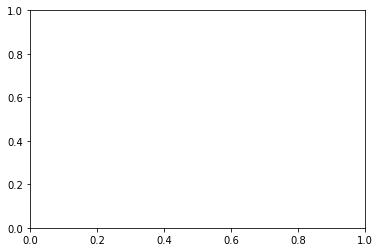

In [ ]:
pop_inchoen.plot(kind='scatter',x=np.arange(0,101), y=pop_inchoen.iloc[:, 1:])
plt.show()

In [ ]:
pop_inchoen.iloc[:, 1:].isna().sum()

2021년01월_계_0~9세       0
2021년01월_계_10~19세     0
2021년01월_계_20~29세     0
2021년01월_계_30~39세     0
2021년01월_계_40~49세     0
2021년01월_계_50~59세     0
2021년01월_계_60~69세     0
2021년01월_계_70~79세     0
2021년01월_계_80~89세     0
2021년01월_계_90~99세     0
2021년01월_계_100세 이상    0
dtype: int64

수정이 어떻게 되는지 확인하기 위함